# やりたひこと

$F=F(x,y)$, $G=G(x,y)$ で与えられているとする。
$L = F + G$ という形のロス関数の極値を視覚化してみる

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#  Example 1

$F(x,y) = (X-1)^2 + (Y-1)^2$

$G(x,y) = X^2 + Y^2$ <- いわゆる $L^2$ ノルム

x=0.50, y=0.50


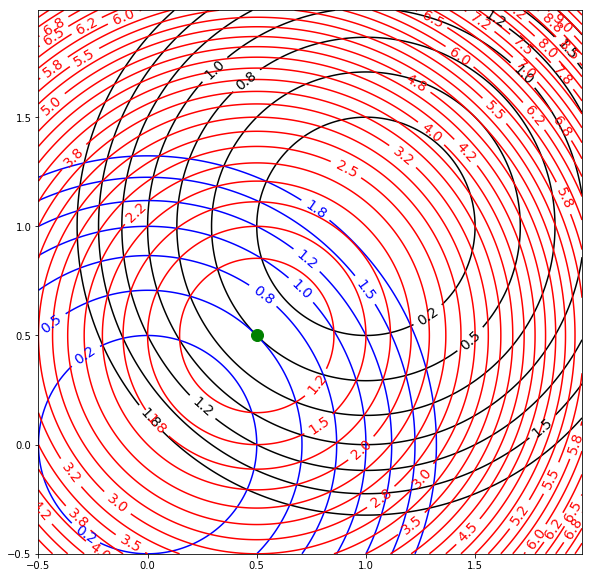

In [2]:
def plot_contour(F,G):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    ax.set_aspect('equal')
    x = np.arange(-0.5, 2, 0.010)
    y = np.arange(-0.5, 2, 0.010)
    X, Y = np.meshgrid(x, y)
    F=F(X,Y)
    cont = ax.contour(X, Y, F, levels=np.arange(0, 2, 0.25), colors=['black'])
    cont.clabel(fmt='%1.1f', fontsize=14)
    G=G(X,Y)
    cont = ax.contour(X, Y, G, levels=np.arange(0, 2, 0.25), colors=['blue'])
    cont.clabel(fmt='%1.1f', fontsize=14)
    cont = ax.contour(X, Y, F+G, levels=np.arange(np.min(F+G), np.max(F+G), 0.25), colors=['red'])
    cont.clabel(fmt='%1.1f', fontsize=14)
    r,c=np.unravel_index(np.argmin(F+G), (F+G).shape)
    ax.plot(x[c],y[r],'go',markersize=12)
    print("x={:.2f}, y={:.2f}".format(x[c],y[r]))
plot_contour(lambda x,y:(x-1)**2+(y-1)**2,lambda x,y:x**2+y**2)

#  Example 2


$F(x,y) = (X-1)^2 + (Y-1)^2$

$G(x,y) = |X| + |Y|$ いわゆる Lasso や $L^1$ ノルム

x=0.50, y=0.50


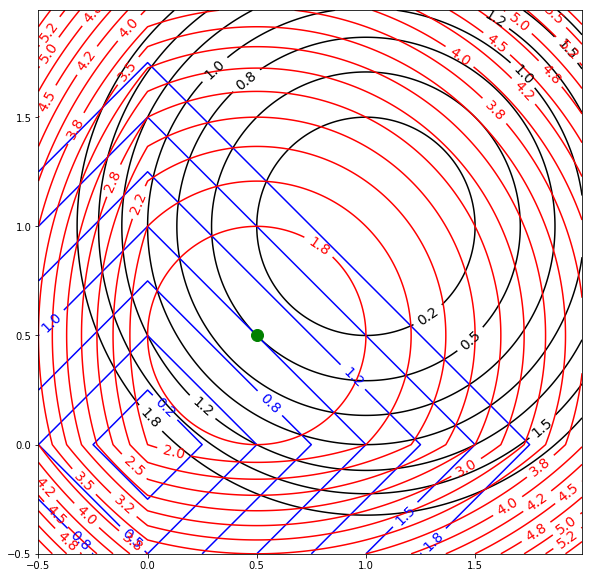

In [3]:
plot_contour(lambda x,y:(x-1)**2+(y-1)**2,lambda x,y:np.abs(x)+np.abs(y),)

# 対話的に $F$ の形をいじる

In [4]:
from ipywidgets import interact
import ipywidgets as widgets

In [5]:
def interact_contour(a,b):
    plot_contour(lambda x,y:(x-a)**2+(y-b)**2,lambda x,y:x**2+y**2)

float_slider_a = widgets.FloatSlider(min=0, max=3, step=0.05,value=0.65)
float_slider_b = widgets.FloatSlider(min=0.1, max=3, step=0.05,value=2.20)
interact(interact_contour,a=float_slider_a,b=float_slider_b)

interactive(children=(FloatSlider(value=0.65, description='a', max=3.0, step=0.05), FloatSlider(value=2.2, description='b', max=3.0, min=0.1, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.interact_contour>

In [6]:
def interact_contour(a,b):
    plot_contour(lambda x,y:(x-a)**2+(y-b)**2,lambda x,y:np.abs(x)+np.abs(y))

float_slider_a = widgets.FloatSlider(min=0, max=3, step=0.05,value=0.65)
float_slider_b = widgets.FloatSlider(min=0.1, max=3, step=0.05,value=2.20)
interact(interact_contour,a=float_slider_a,b=float_slider_b)

interactive(children=(FloatSlider(value=0.65, description='a', max=3.0, step=0.05), FloatSlider(value=2.2, description='b', max=3.0, min=0.1, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.interact_contour>